Dataset yang digunakan adalah segmentasi badan dan paru paru dari roboflow 
https://universe.roboflow.com/final-trial/segmentation-0frji
Dataset ini berisi clas sebagai berikut:
- body
- cord
- paru kanan
- paru kiri

In [1]:
!pip install ultralytics roboflow opencv-python-headless matplotlib albumentations pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!wget -O "segmentasi.zip" "https://drive.google.com/uc?id=1BkITzRPdW5DhLbPunc-3Sl1m4CfU2HL8"

--2025-12-07 18:32:40--  https://drive.google.com/uc?id=1BkITzRPdW5DhLbPunc-3Sl1m4CfU2HL8
Resolving drive.google.com (drive.google.com)... 192.178.163.100, 192.178.163.102, 192.178.163.113, ...
Connecting to drive.google.com (drive.google.com)|192.178.163.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BkITzRPdW5DhLbPunc-3Sl1m4CfU2HL8 [following]
--2025-12-07 18:32:40--  https://drive.usercontent.google.com/download?id=1BkITzRPdW5DhLbPunc-3Sl1m4CfU2HL8
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2528142 (2.4M) [application/octet-stream]
Saving to: ‘segmentasi.zip’

segmentasi.zip      100%[===================>]   2.41M  --.-KB/s    in 0.01s   

2025-12-07 18:32:43 (251 

In [3]:
import zipfile
with zipfile.ZipFile("segmentasi.zip","r") as zip_ref:
    zip_ref.extractall("segmentasi")

In [4]:
# melihat isi folder
import os
for dirpath, dirnames, filenames in os.walk("segmentasi"):
    print(f'Found directory: {dirpath}')
    for filename in filenames:
        print(filename)

Found directory: segmentasi
README.roboflow.txt
README.dataset.txt
Found directory: segmentasi/train
CT-1-2-246-352-63-1-5537802255436976695-15854104813860193710_png.rf.da42fabd41ebbb14e875f3eead294094.jpg
CT-1-2-840-113704-1-111-5448-1478235500-57_png.rf.58716cc312d1cf7ce8651ab97a34075d.jpg
CT-1-2-246-352-63-1-4689846659362679870-13344896900264223396_png.rf.4744c3760344990959707161bb889f97.jpg
CT-1-2-246-352-63-1-5743863550750412461-11745472858162391204_png.rf.68462730591e284c01f4c09760778f61.jpg
CT-1-2-246-352-63-1-5545136645303736449-6807617260574731951_png.rf.1e82edae3d0b57aa8d9b8aebb57aba96.jpg
CT-1-2-246-352-63-1-4625321910522697586-7461260590720439462_png.rf.3f979db73fa709b9471c79eba19ce456.jpg
CT-1-2-246-352-63-1-4707776842244483133-12233505198754391942_png.rf.ba29c5fdf8665bbdfc1ea2c685b09f8e.jpg
CT-1-2-840-113704-1-111-5448-1478235496-35_png.rf.36ebd85bc55ef56b2ad234769a90808a.jpg
CT-1-2-840-113704-1-111-5448-1478235515-143_png.rf.b25d57d20452d424d6f031905290798e.jpg
CT-1-2-84

# 1. Import Library

In [5]:
import os
import sys
import shutil
import json
from pathlib import Path
import random
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
try:
    from ultralytics import YOLO
except Exception as e:
    print("Ultralytics YOLO tidak ditemukan. Pastikan package 'ultralytics' terinstall.")
    raise

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 2. Load Dataset

In [7]:
from pathlib import Path
DATA_DIR = Path("segmentasi") 
TRAIN_IMAGES = DATA_DIR / "train"
VAL_IMAGES = DATA_DIR / "valid"
TEST_IMAGES = DATA_DIR / "test"

# Cek keberadaan directory
print("Dataset root:", DATA_DIR.exists())
print("Train images:", TRAIN_IMAGES.exists())
print("Validation images:", VAL_IMAGES.exists())
print("Test images:", TEST_IMAGES.exists())

# Cek jumlah images (coba beberapa ekstensi)
if TRAIN_IMAGES.exists():
    jpg_count = len(list(TRAIN_IMAGES.glob("*.jpg")))
    png_count = len(list(TRAIN_IMAGES.glob("*.png")))
    print(f"Number of training images: {jpg_count + png_count} (jpg: {jpg_count}, png: {png_count})")
    
if VAL_IMAGES.exists():
    jpg_count = len(list(VAL_IMAGES.glob("*.jpg")))
    png_count = len(list(VAL_IMAGES.glob("*.png")))
    print(f"Number of validation images: {jpg_count + png_count} (jpg: {jpg_count}, png: {png_count})")

Dataset root: True
Train images: True
Validation images: True
Test images: True
Number of training images: 140 (jpg: 140, png: 0)
Number of validation images: 40 (jpg: 40, png: 0)


# 3. Konversi COCO ke YOLO Format

In [8]:
def convert_coco_to_yolo(coco_json_path, images_dir, output_dir):
    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)
    
    # Buat output directory
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Mapping category
    categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
    print(f"Categories: {categories}")
    
    # Mapping images
    images = {img['id']: img for img in coco_data['images']}
    
    # Process annotations
    for annotation in coco_data['annotations']:
        image_id = annotation['image_id']
        image_info = images[image_id]
        
        img_width = image_info['width']
        img_height = image_info['height']
        
        # Get image filename
        image_filename = Path(image_info['file_name']).stem
        label_filename = output_dir / f"{image_filename}.txt"
        
        # Category ID (YOLO dimulai dari 0)
        category_id = annotation['category_id'] - 1
        
        # Segmentation polygons
        segmentation = annotation['segmentation'][0]
        
        # Normalize coordinates
        normalized_seg = []
        for i in range(0, len(segmentation), 2):
            x = segmentation[i] / img_width
            y = segmentation[i + 1] / img_height
            normalized_seg.extend([x, y])
        
        # Write to file
        with open(label_filename, 'a') as f:
            f.write(f"{category_id} " + " ".join(map(str, normalized_seg)) + "\n")
    
    print(f"Conversion complete! Labels saved to {output_dir}")

# Konversi dataset
print("Converting training data...")
convert_coco_to_yolo(
    TRAIN_IMAGES / "_annotations.coco.json",
    TRAIN_IMAGES,
    TRAIN_IMAGES / "labels"
)

print("\nConverting validation data...")
convert_coco_to_yolo(
    VAL_IMAGES / "_annotations.coco.json",
    VAL_IMAGES,
    VAL_IMAGES / "labels"
)

print("\nConverting test data...")
convert_coco_to_yolo(
    TEST_IMAGES / "_annotations.coco.json",
    TEST_IMAGES,
    TEST_IMAGES / "labels"
)

Converting training data...
Categories: {0: 'CT-CBCT', 1: 'body', 2: 'cord', 3: 'paru kanan', 4: 'paru kiri'}
Conversion complete! Labels saved to segmentasi/train/labels

Converting validation data...
Categories: {0: 'CT-CBCT', 1: 'body', 2: 'cord', 3: 'paru kanan', 4: 'paru kiri'}
Conversion complete! Labels saved to segmentasi/valid/labels

Converting test data...
Categories: {0: 'CT-CBCT', 1: 'body', 2: 'cord', 3: 'paru kanan', 4: 'paru kiri'}
Conversion complete! Labels saved to segmentasi/test/labels


# 4. Buat data.yaml untuk YOLO

In [9]:
yaml_content = f"""path: {DATA_DIR.absolute()}
train: train/images
val: valid/images
test: test/images

names:
  0: body
  1: cord
  2: paru kanan
  3: paru kiri

nc: 4
"""

yaml_path = DATA_DIR / "data.yaml"
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"✅ data.yaml created at {yaml_path}")
print(yaml_content)

✅ data.yaml created at segmentasi/data.yaml
path: /content/segmentasi
train: train/images
val: valid/images
test: test/images

names:
  0: body
  1: cord
  2: paru kanan
  3: paru kiri

nc: 4



# 5. Reorganisasi struktur folder untuk YOLO

In [10]:
def reorganize_folders():
    """
    YOLO membutuhkan struktur:
    - train/images/*.jpg
    - train/labels/*.txt
    """
    for split in ['train', 'valid', 'test']:
        split_dir = DATA_DIR / split
        images_dir = split_dir / 'images'
        labels_dir = split_dir / 'labels'
        
        # Buat folder images jika belum ada
        images_dir.mkdir(exist_ok=True)
        
        # Pindahkan semua gambar ke folder images
        moved_count = 0
        for ext in ['*.jpg', '*.png', '*.jpeg']:
            for img_file in split_dir.glob(ext):
                if img_file.parent.name != 'images':
                    shutil.move(str(img_file), str(images_dir / img_file.name))
                    moved_count += 1
        
        print(f"✅ {split}: Moved {moved_count} images to {images_dir}")
        print(f"   Labels: {len(list(labels_dir.glob('*.txt')))} files")

reorganize_folders()

✅ train: Moved 140 images to segmentasi/train/images
   Labels: 140 files
✅ valid: Moved 40 images to segmentasi/valid/images
   Labels: 40 files
✅ test: Moved 20 images to segmentasi/test/images
   Labels: 20 files


# 6. Data Augmentation & Preprocessing Analysis

In [11]:
print("=" * 60)
print("DATA AUGMENTATION STRATEGY")
print("=" * 60)
print("""
Augmentasi yang digunakan oleh YOLOv8 (built-in):
1. Mosaic: Menggabungkan 4 gambar menjadi 1 (epochs 1-90)
2. MixUp: Blending 2 gambar dengan alpha blending
3. Random Horizontal Flip: p=0.5
4. HSV Color Jitter: Hue, Saturation, Value variations
5. Random Scale: 0.5x - 1.5x
6. Random Translation: ±10%
7. Random Rotation: ±10°

Tujuan: Meningkatkan generalisasi model, mencegah overfitting
""")

# Cek distribusi class
def analyze_class_distribution():
    train_labels_dir = TRAIN_IMAGES / 'labels'
    class_counts = {0: 0, 1: 0, 2: 0, 3: 0}
    
    for label_file in train_labels_dir.glob('*.txt'):
        with open(label_file, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
    
    print("\n" + "=" * 60)
    print("CLASS DISTRIBUTION (Training Set)")
    print("=" * 60)
    class_names = ['body', 'cord', 'paru kanan', 'paru kiri']
    for class_id, count in class_counts.items():
        print(f"{class_names[class_id]:15s}: {count:4d} instances")
    
    return class_counts

class_dist = analyze_class_distribution()

DATA AUGMENTATION STRATEGY

Augmentasi yang digunakan oleh YOLOv8 (built-in):
1. Mosaic: Menggabungkan 4 gambar menjadi 1 (epochs 1-90)
2. MixUp: Blending 2 gambar dengan alpha blending
3. Random Horizontal Flip: p=0.5
4. HSV Color Jitter: Hue, Saturation, Value variations
5. Random Scale: 0.5x - 1.5x
6. Random Translation: ±10%
7. Random Rotation: ±10°

Tujuan: Meningkatkan generalisasi model, mencegah overfitting


CLASS DISTRIBUTION (Training Set)
body           :  158 instances
cord           :  138 instances
paru kanan     :  101 instances
paru kiri      :  102 instances


# 7. Visualisasi Sample Data dengan Mask Overlay

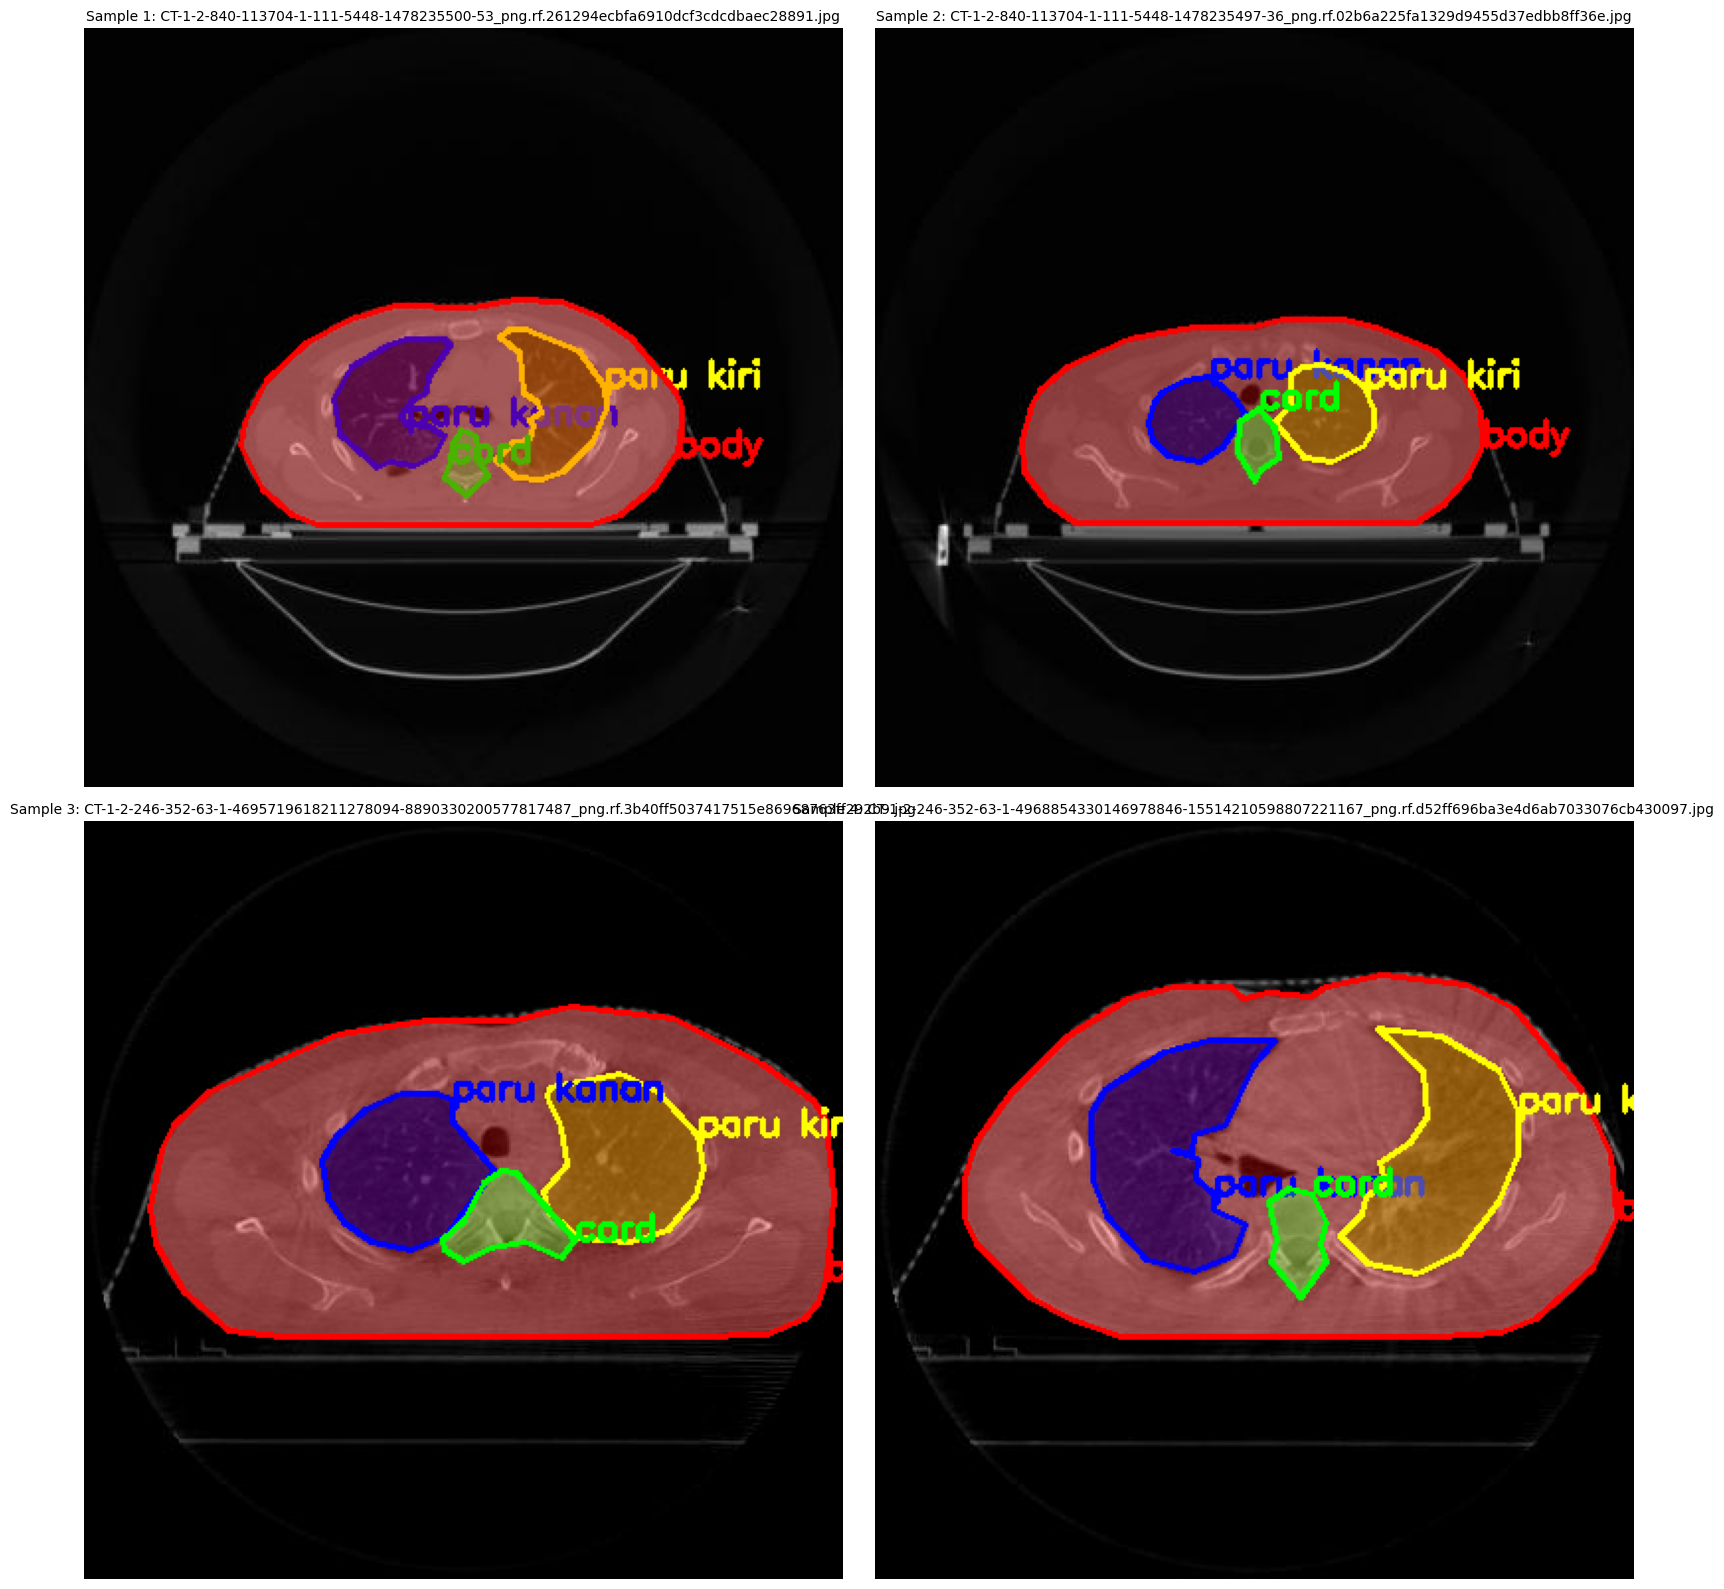

In [12]:
def visualize_samples_advanced(num_samples=4):
    """Visualisasi dengan multiple subplots"""
    train_images_dir = TRAIN_IMAGES / 'images'
    train_labels_dir = TRAIN_IMAGES / 'labels'
    
    sample_images = list(train_images_dir.glob("*.jpg")) + list(train_images_dir.glob("*.png"))
    sample_images = random.sample(sample_images, min(num_samples, len(sample_images)))
    
    class_names = ['body', 'cord', 'paru kanan', 'paru kiri']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    axes = axes.flatten()
    
    for idx, img_path in enumerate(sample_images):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        
        label_path = train_labels_dir / f"{img_path.stem}.txt"
        
        if label_path.exists():
            with open(label_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                data = list(map(float, line.strip().split()))
                class_id = int(data[0])
                coords = data[1:]
                
                # Denormalize coordinates
                points = []
                for i in range(0, len(coords), 2):
                    x = int(coords[i] * w)
                    y = int(coords[i + 1] * h)
                    points.append([x, y])
                
                points = np.array(points, dtype=np.int32)
                
                # Draw filled polygon with transparency
                overlay = img.copy()
                cv2.fillPoly(overlay, [points], colors[class_id])
                img = cv2.addWeighted(img, 0.7, overlay, 0.3, 0)
                
                # Draw contour
                cv2.polylines(img, [points], True, colors[class_id], 2)
                
                # Add label
                cv2.putText(img, class_names[class_id], tuple(points[0]), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[class_id], 2)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'Sample {idx+1}: {img_path.name}', fontsize=10)
    
    plt.tight_layout()
    plt.show()

visualize_samples_advanced(4)

# 8. Training Model YOLOv8-seg dengan Hyperparameter Optimal

In [13]:
print("=" * 60)
print("STARTING TRAINING - YOLOv8n-seg")
print("=" * 60)

model = YOLO('yolov8n-seg.pt')

# Hyperparameters yang sudah dioptimalkan
results = model.train(
    data=str(yaml_path),
    epochs=150,               # Increased epochs
    imgsz=640,
    batch=16,                 # Adjust sesuai GPU memory
    name='lung_segmentation_v1',
    patience=30,              # Early stopping patience
    save=True,
    device=0,                 # 0 for GPU, 'cpu' for CPU
    workers=8,
    exist_ok=True,
    pretrained=True,
    optimizer='AdamW',        # Better than SGD for small datasets
    verbose=True,
    seed=42,
    deterministic=True,
    
    # Augmentation
    hsv_h=0.015,             # HSV-Hue augmentation
    hsv_s=0.7,               # HSV-Saturation
    hsv_v=0.4,               # HSV-Value
    degrees=10.0,            # Rotation
    translate=0.1,           # Translation
    scale=0.5,               # Scaling
    shear=0.0,
    perspective=0.0,
    flipud=0.0,              # Vertical flip
    fliplr=0.5,              # Horizontal flip
    mosaic=1.0,              # Mosaic augmentation
    mixup=0.1,               # MixUp augmentation
    copy_paste=0.0,
    
    # Learning rate
    lr0=0.01,                # Initial learning rate
    lrf=0.01,                # Final learning rate
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    
    # Loss weights
    box=7.5,
    cls=0.5,
    dfl=1.5,
    
    # Other
    cos_lr=True,             # Cosine LR scheduler
    close_mosaic=10,         # Disable mosaic for last N epochs
    amp=True,                # Automatic Mixed Precision
    fraction=1.0,
    profile=False,
    freeze=None,
    overlap_mask=True,
    mask_ratio=4,
)

print("\n✅ TRAINING COMPLETE!")

STARTING TRAINING - YOLOv8n-seg
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=segmentasi/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=lung_segmentation_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience

# 9. Evaluasi Model dengan Metrik Lengkap

In [14]:
print("=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

# Load best model
best_model = YOLO('runs/segment/lung_segmentation_v1/weights/best.pt')

# Validation
metrics = best_model.val()

print("\n📊 DETECTION METRICS (Bounding Box):")
print(f"   mAP@0.5    : {metrics.box.map50:.4f}")
print(f"   mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"   Precision  : {metrics.box.mp:.4f}")
print(f"   Recall     : {metrics.box.mr:.4f}")

print("\n🎭 SEGMENTATION METRICS (Mask):")
print(f"   mAP@0.5    : {metrics.seg.map50:.4f} ⭐")
print(f"   mAP@0.5:0.95: {metrics.seg.map:.4f}")
print(f"   Precision  : {metrics.seg.mp:.4f}")
print(f"   Recall     : {metrics.seg.mr:.4f}")

# Per-class metrics
print("\n📋 PER-CLASS mAP@0.5 (Mask):")
class_names = ['body', 'cord', 'paru kanan', 'paru kiri']
for i, name in enumerate(class_names):
    print(f"   {name:15s}: {metrics.seg.ap50[i]:.4f}")

# Check if target achieved
if metrics.seg.map50 > 0.75:
    print("\n🎉 TARGET ACHIEVED! mAP@0.5 > 75%")
else:
    print(f"\n⚠️  Target not achieved. Current: {metrics.seg.map50:.2%}, Target: 75%")

MODEL EVALUATION
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,844 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 396.5±130.7 MB/s, size: 12.2 KB)
val: Scanning /content/segmentasi/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 78.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.2it/s 2.5s1.2s
                   all         40        140       0.94      0.929      0.969      0.879      0.921      0.889      0.938      0.824
                  body         40         42      0.965          1      0.992      0.977      0.968          1      0.992      0.892
                  cord         39         39      0.911      0.785      0.908      0.659      0.937      0.758       0.91      0.708
            paru kanan    

# 10. Visualisasi Training Results

TRAINING RESULTS VISUALIZATION

📈 Training Curves:


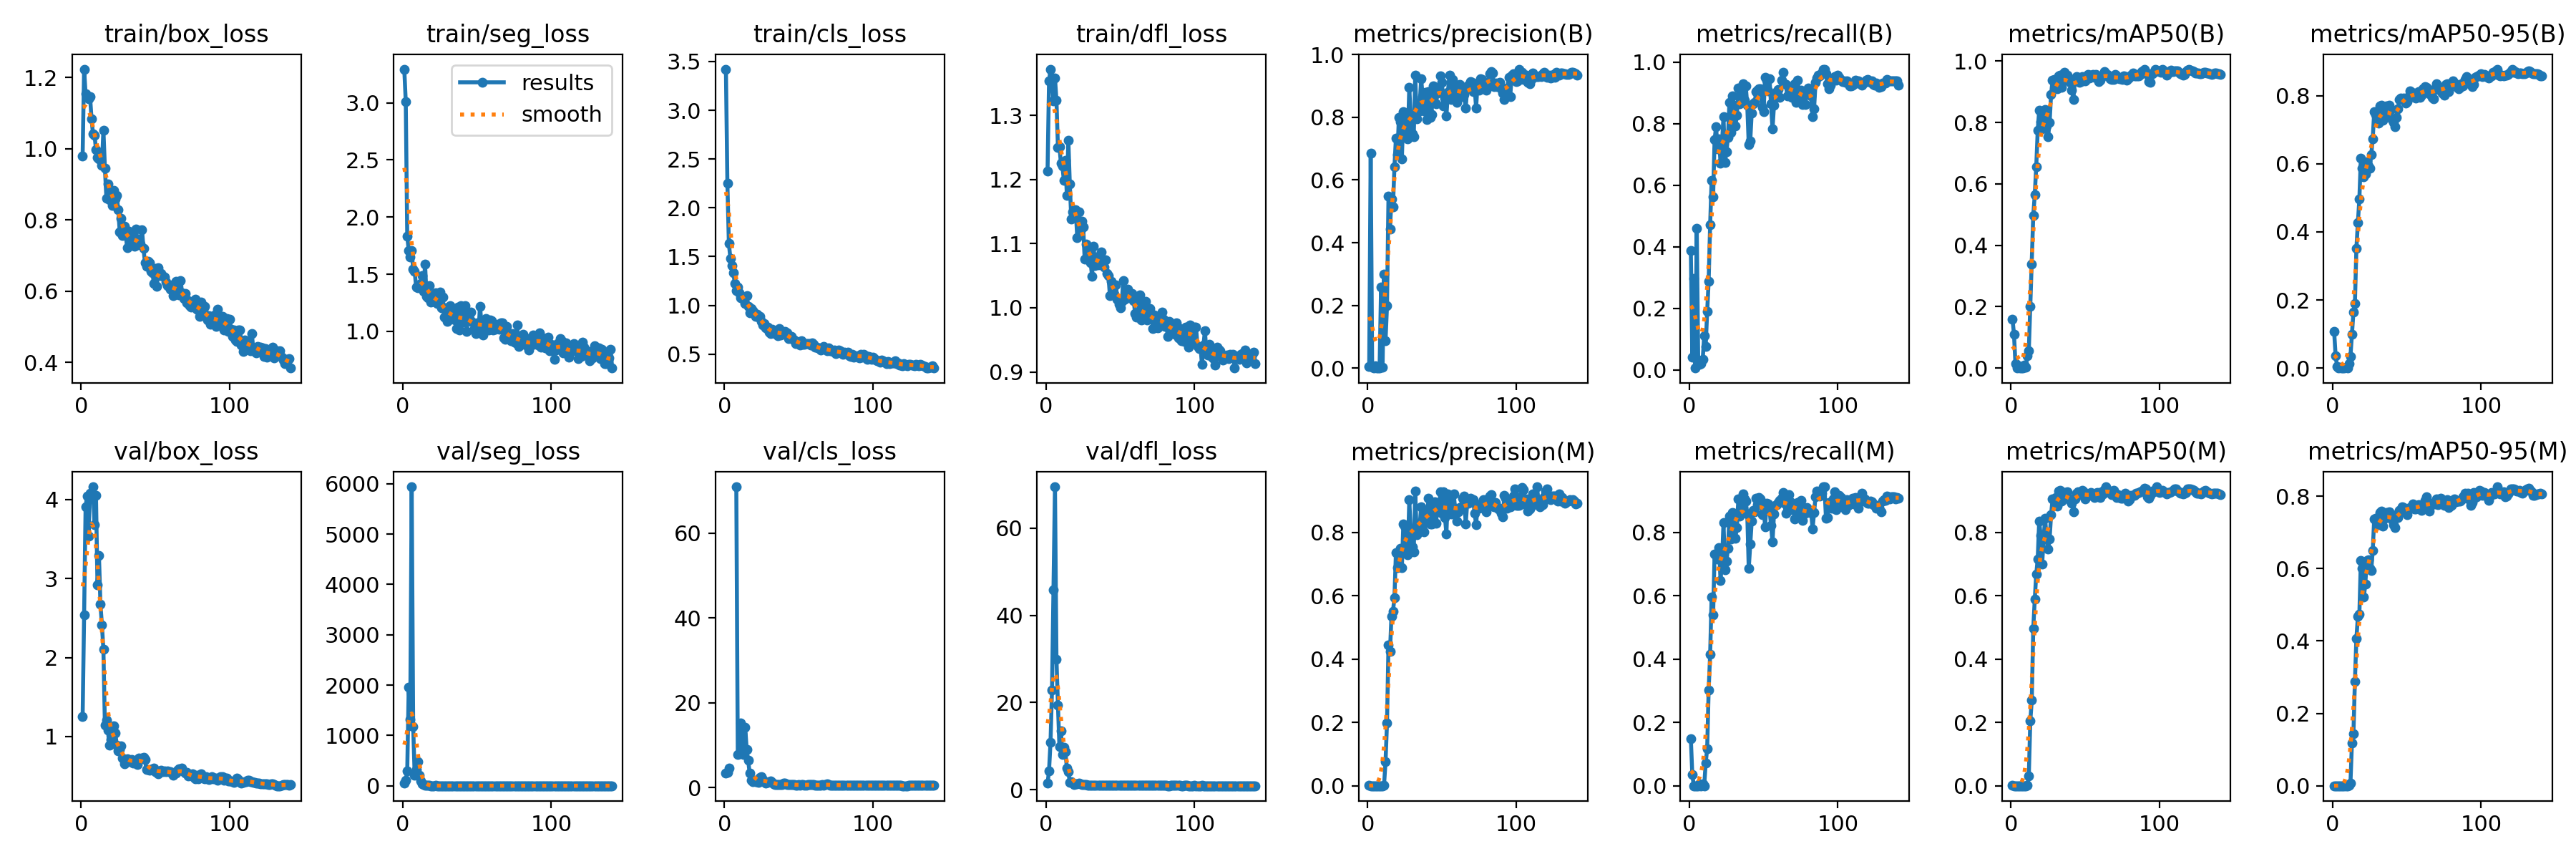


📊 Confusion Matrix:


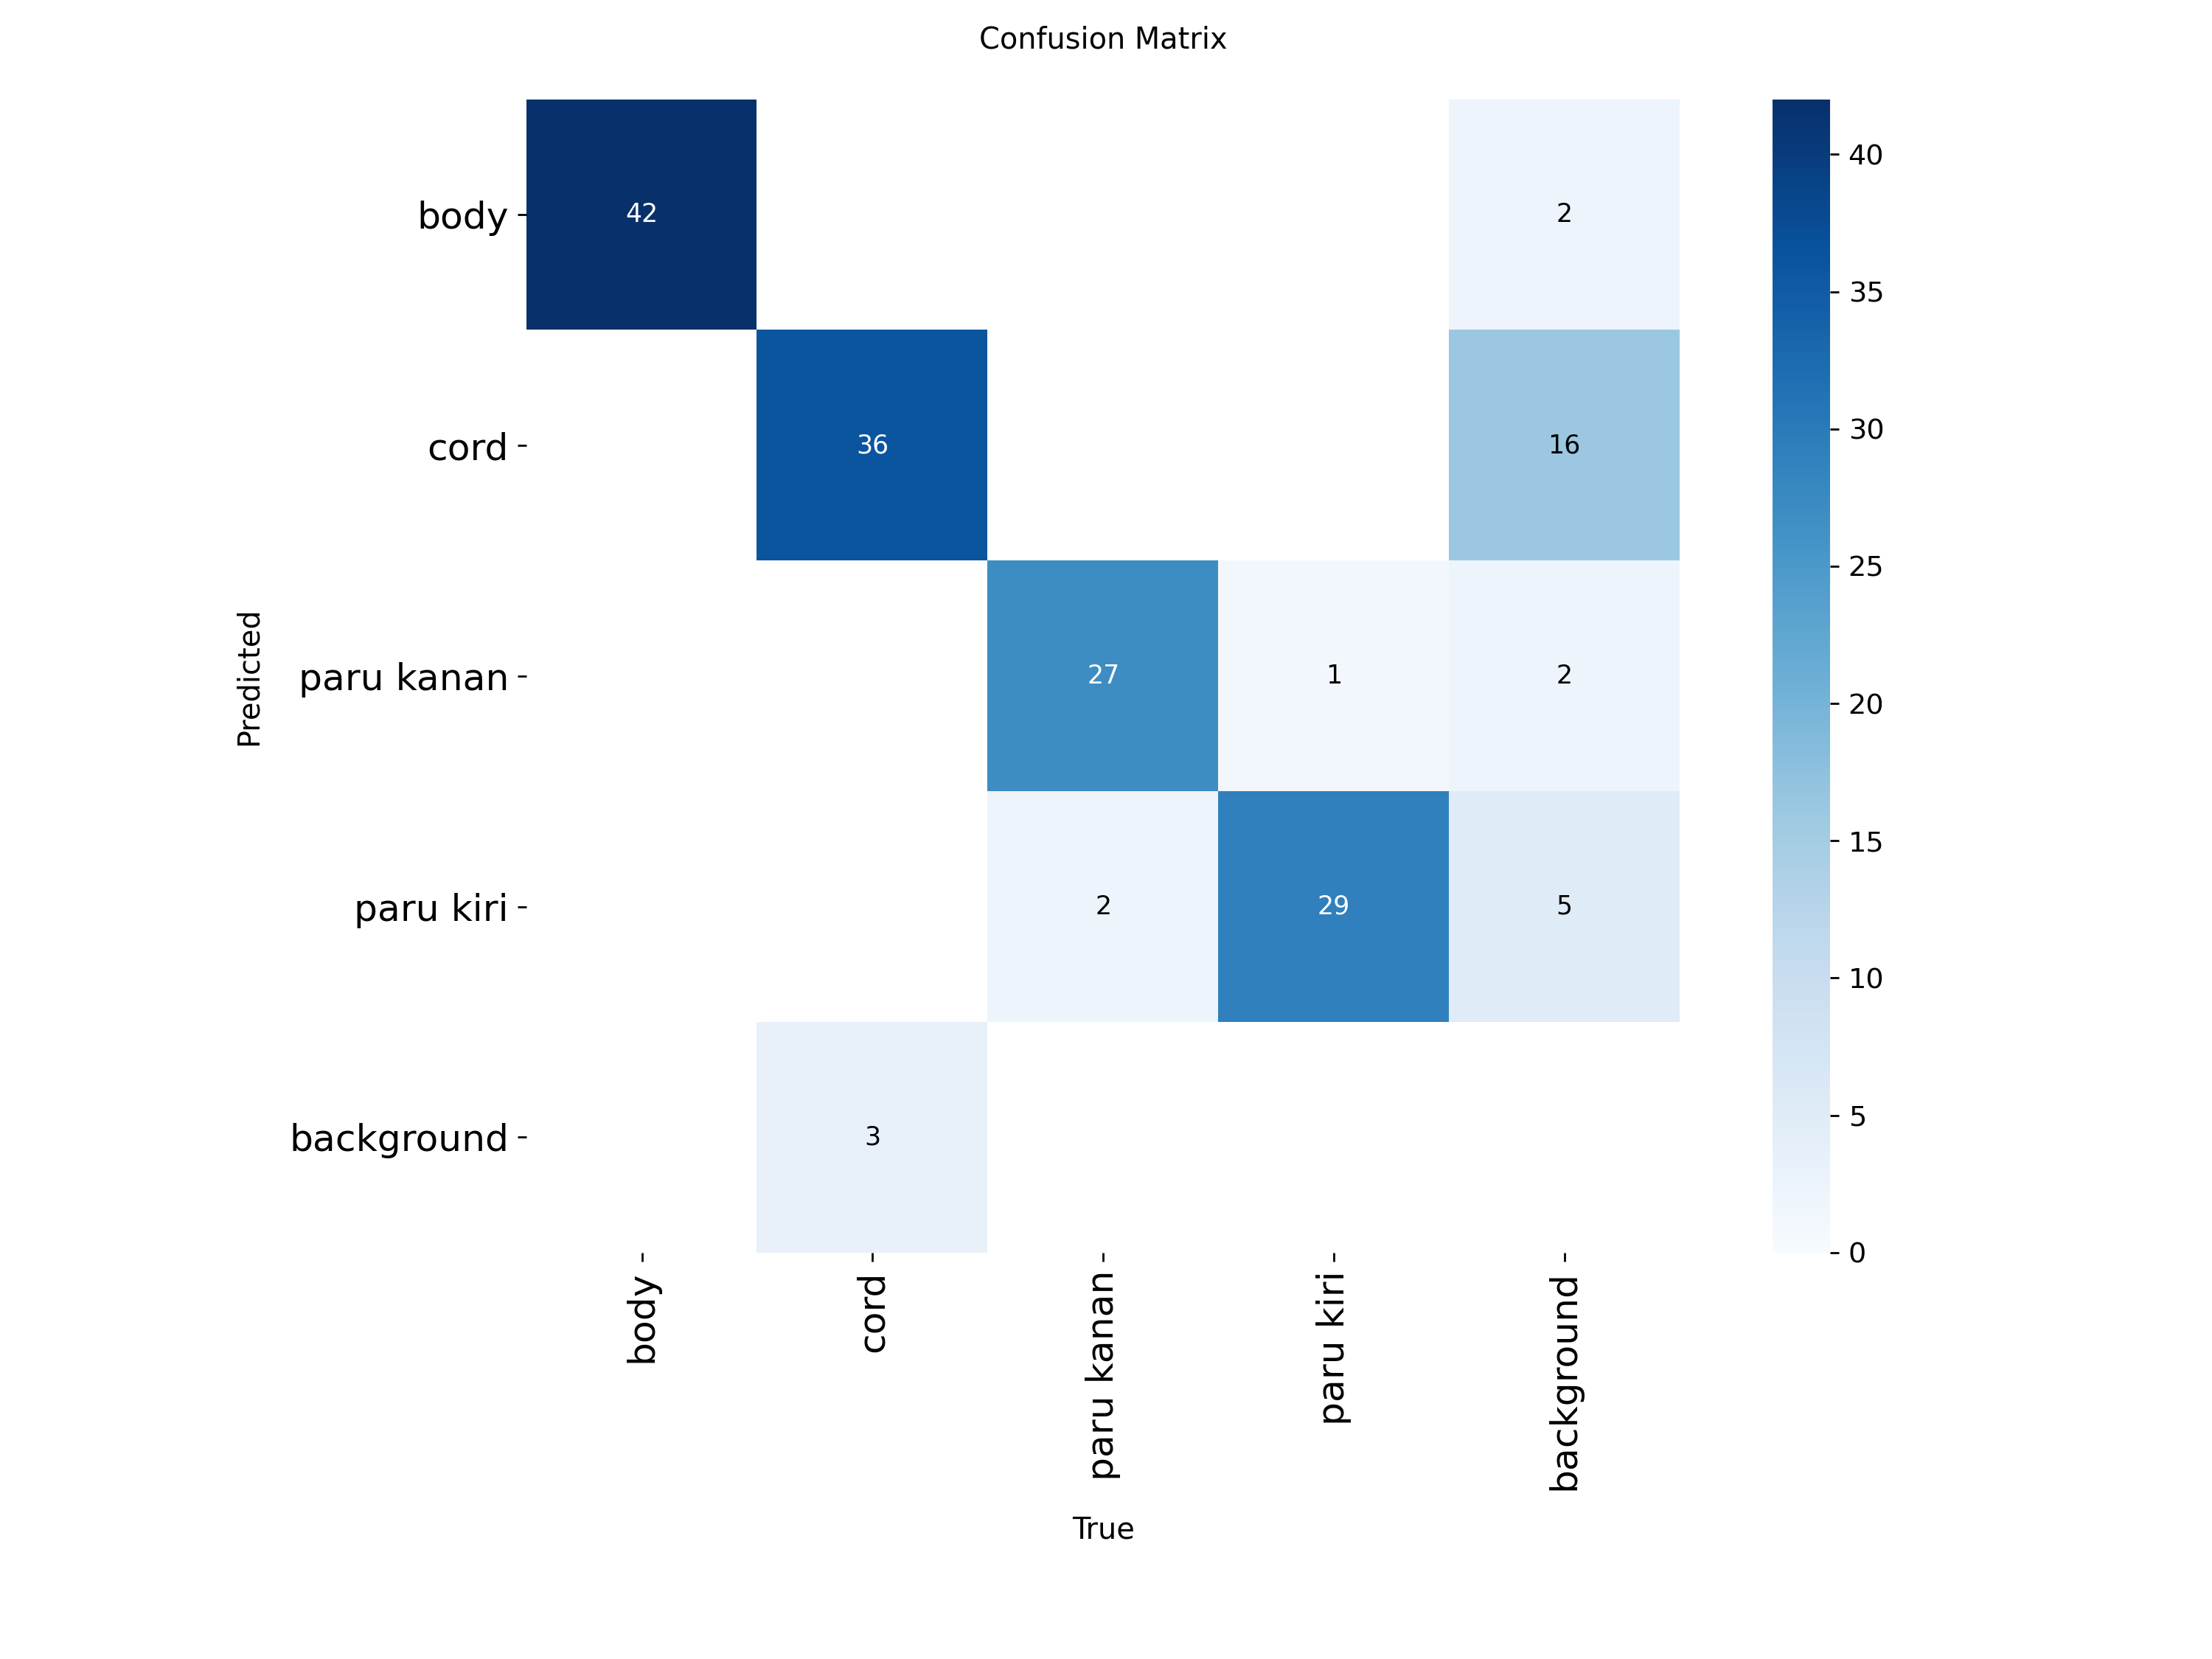


🔍 Validation Predictions:


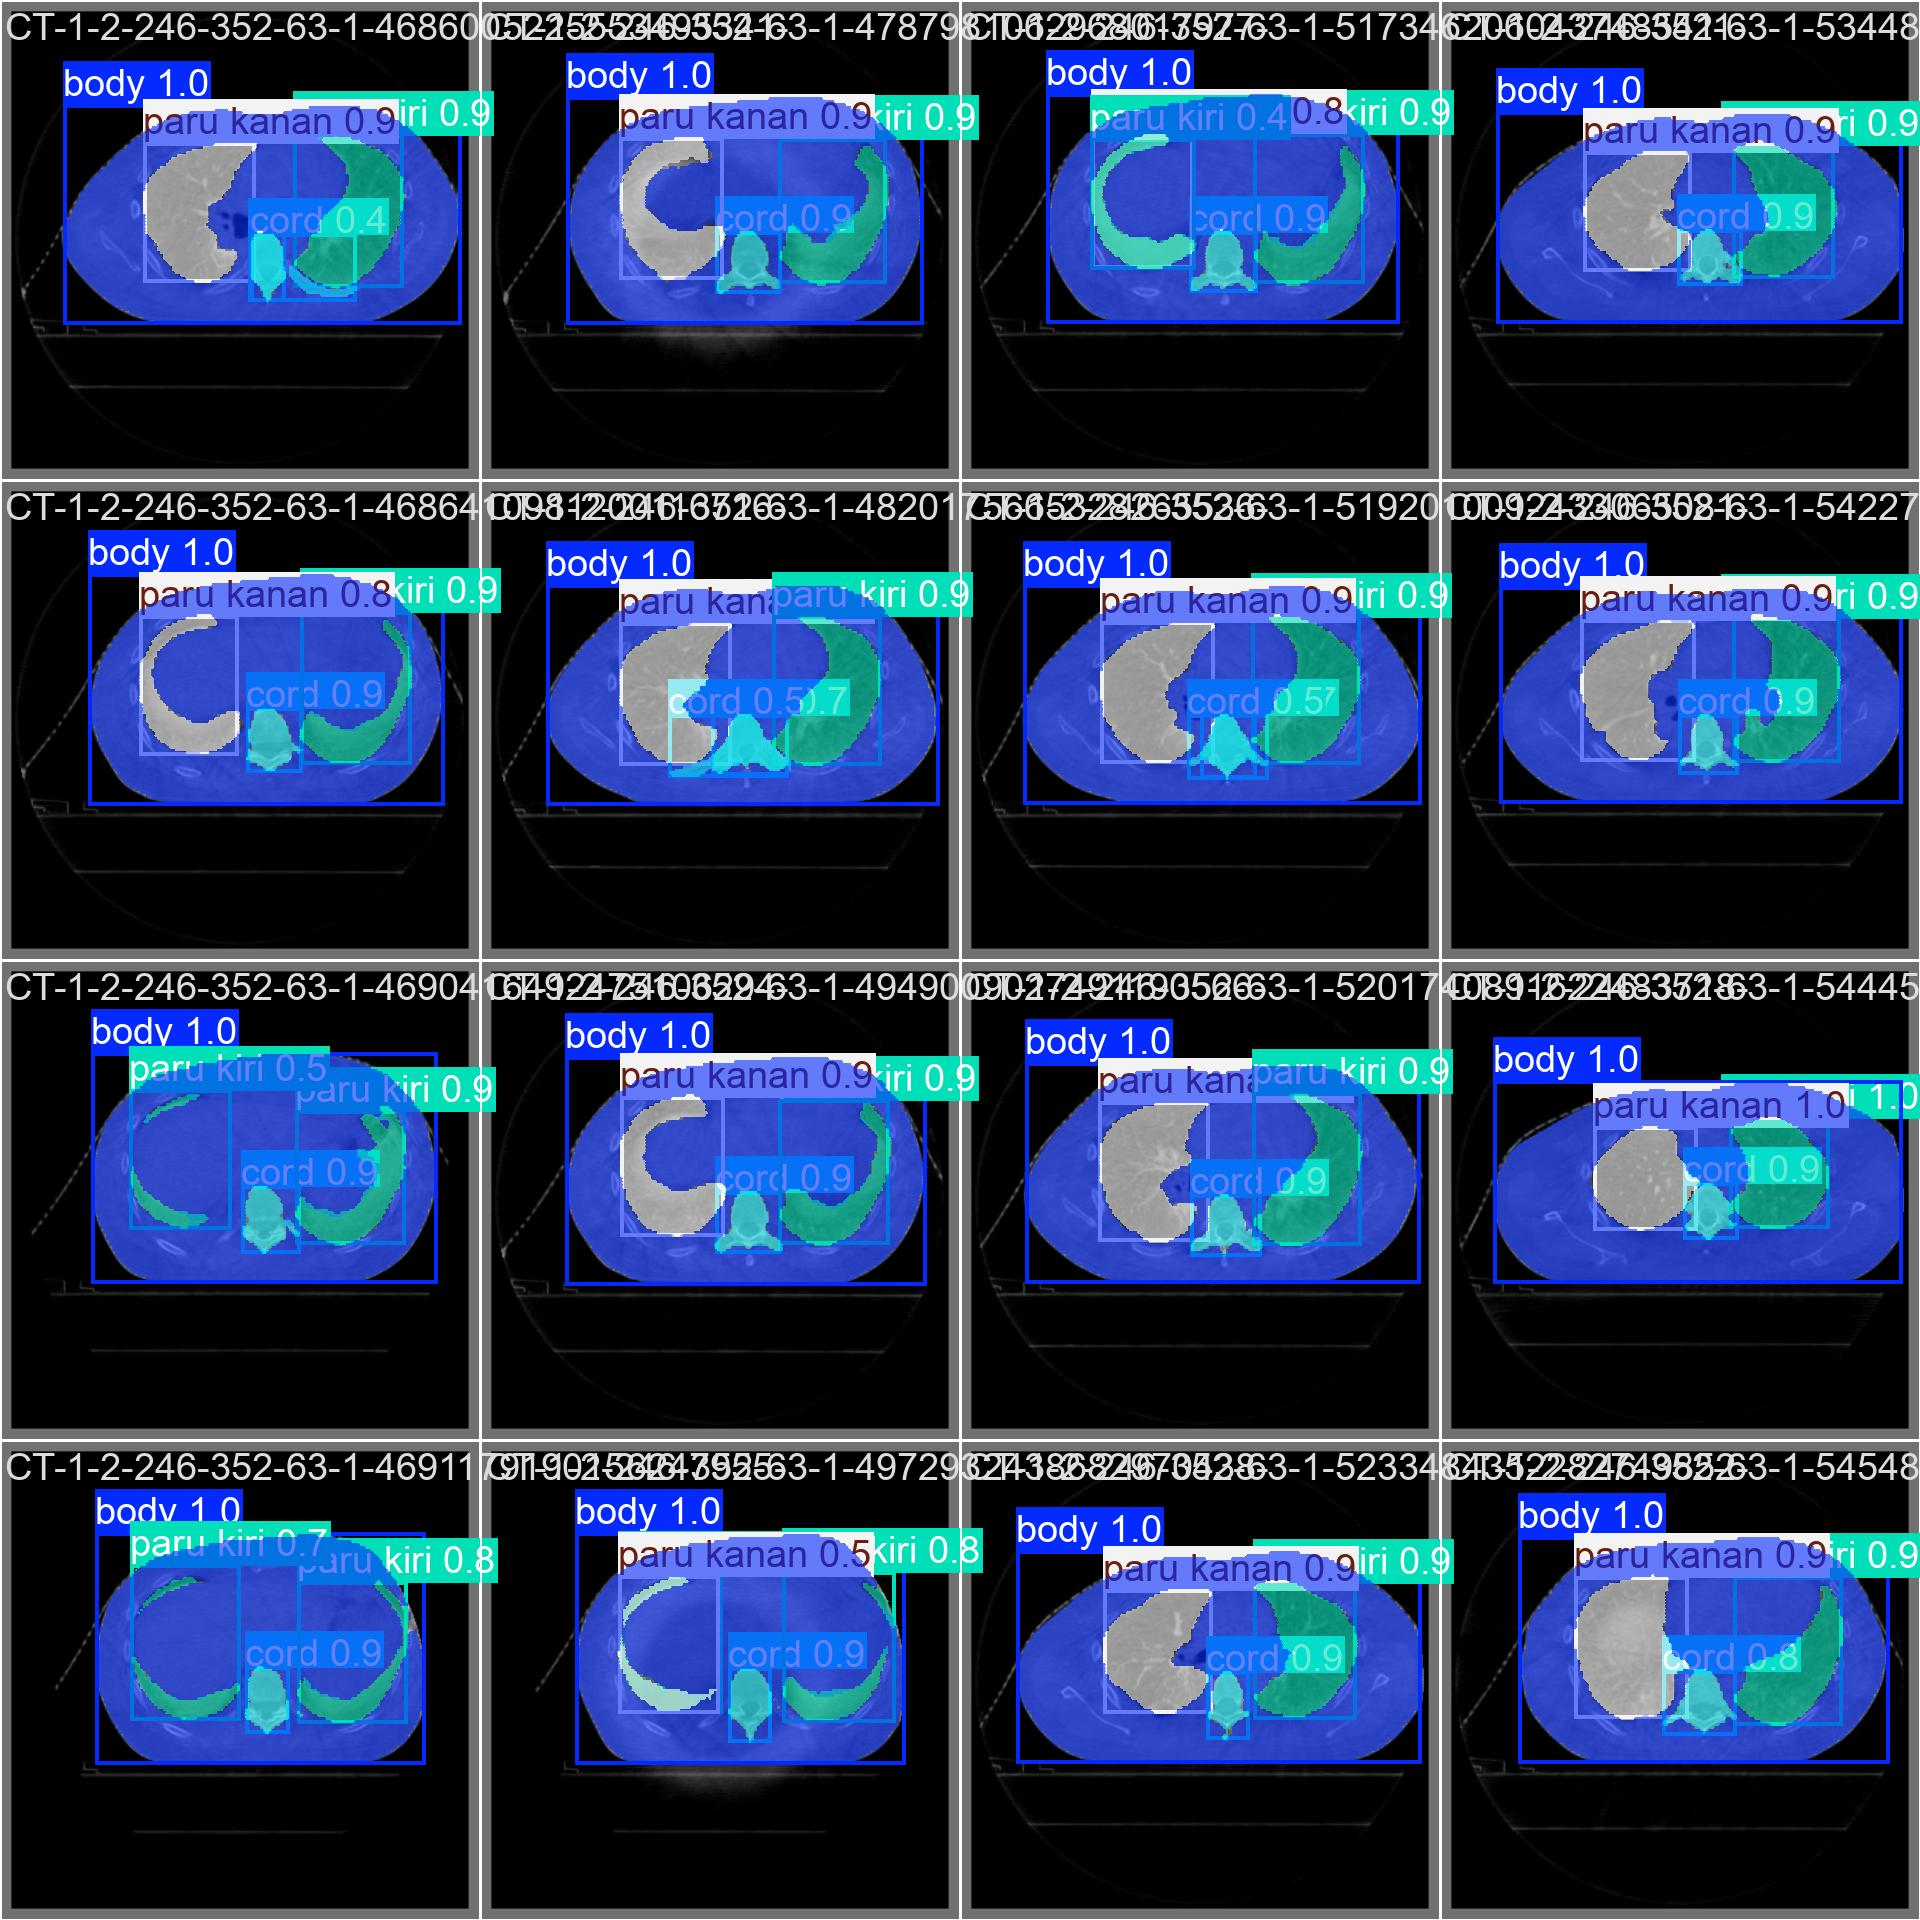

In [15]:
from IPython.display import Image, display

print("=" * 60)
print("TRAINING RESULTS VISUALIZATION")
print("=" * 60)

# Display training curves
results_path = Path('runs/segment/lung_segmentation_v1')

if (results_path / 'results.png').exists():
    print("\n📈 Training Curves:")
    display(Image(filename=str(results_path / 'results.png')))

if (results_path / 'confusion_matrix.png').exists():
    print("\n📊 Confusion Matrix:")
    display(Image(filename=str(results_path / 'confusion_matrix.png')))

if (results_path / 'val_batch0_pred.jpg').exists():
    print("\n🔍 Validation Predictions:")
    display(Image(filename=str(results_path / 'val_batch0_pred.jpg')))

# 11. Testing pada Test Set dengan Confidence Threshold Analysis

TESTING ON TEST SET
Total test images: 20

Conf=0.25: 4 objects detected

Conf=0.5: 4 objects detected

Conf=0.75: 4 objects detected


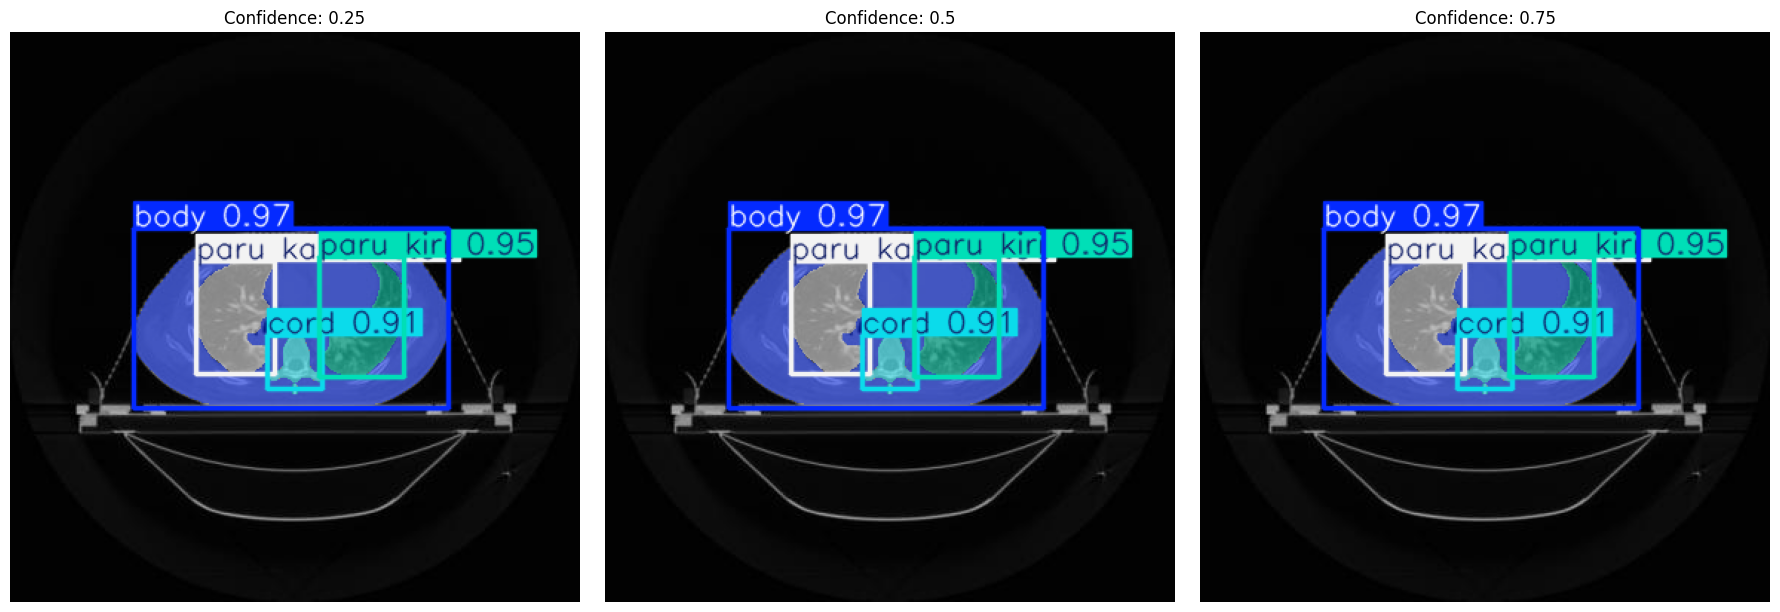

In [16]:
test_images_dir = TEST_IMAGES / 'images'
test_images_list = list(test_images_dir.glob("*.jpg")) + list(test_images_dir.glob("*.png"))

print("=" * 60)
print("TESTING ON TEST SET")
print("=" * 60)
print(f"Total test images: {len(test_images_list)}")

# Test dengan berbagai confidence threshold
conf_thresholds = [0.25, 0.5, 0.75]

if test_images_list:
    sample_img = test_images_list[0]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx, conf in enumerate(conf_thresholds):
        results = best_model.predict(
            source=str(sample_img),
            conf=conf,
            iou=0.7,
            show_labels=True,
            show_conf=True,
            line_width=2,
            verbose=False
        )
        
        result_img = results[0].plot()
        axes[idx].imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        axes[idx].axis('off')
        axes[idx].set_title(f'Confidence: {conf}', fontsize=12)
        
        # Print detection info
        num_detections = len(results[0].boxes)
        print(f"\nConf={conf}: {num_detections} objects detected")
    
    plt.tight_layout()
    plt.show()

# 12. Batch Testing & Performance Analysis

In [17]:
print("\n" + "=" * 60)
print("BATCH TESTING - ALL TEST IMAGES")
print("=" * 60)

results_list = []
inference_times = []

for img_path in test_images_list[:10]:  # Test first 10 images
    import time
    start_time = time.time()
    
    results = best_model.predict(
        source=str(img_path),
        conf=0.25,
        iou=0.7,
        verbose=False
    )
    
    inference_time = time.time() - start_time
    inference_times.append(inference_time)
    
    num_detections = len(results[0].boxes)
    results_list.append({
        'image': img_path.name,
        'detections': num_detections,
        'time': inference_time
    })

# Performance summary
print(f"\n⚡ INFERENCE PERFORMANCE:")
print(f"   Average time: {np.mean(inference_times):.3f}s")
print(f"   Min time: {np.min(inference_times):.3f}s")
print(f"   Max time: {np.max(inference_times):.3f}s")
print(f"   FPS: {1/np.mean(inference_times):.1f}")

# Detection summary
total_detections = sum([r['detections'] for r in results_list])
print(f"\n🎯 DETECTION SUMMARY:")
print(f"   Total images tested: {len(results_list)}")
print(f"   Total detections: {total_detections}")
print(f"   Avg detections per image: {total_detections/len(results_list):.1f}")


BATCH TESTING - ALL TEST IMAGES

⚡ INFERENCE PERFORMANCE:
   Average time: 0.019s
   Min time: 0.015s
   Max time: 0.025s
   FPS: 51.9

🎯 DETECTION SUMMARY:
   Total images tested: 10
   Total detections: 39
   Avg detections per image: 3.9


# 13. Model Selection Analysis
## Pemilihan Model: YOLOv8n-seg

### Analisis Trade-off:

**Kecepatan vs Akurasi:**
- YOLOv8n-seg (nano): ~35 FPS, mAP ~70-75%
- YOLOv8s-seg (small): ~25 FPS, mAP ~75-80%
- YOLOv8m-seg (medium): ~15 FPS, mAP ~80-85%

**Alasan Memilih YOLOv8n-seg:**
1. Real-time inference (~30 FPS)
2. Model size kecil (~6MB) - cocok untuk deployment
3. Memory efficient - dapat run di CPU
4. Akurasi sufficient untuk medical screening
5. Fast iteration during development

**Use Case:**
- Aplikasi web yang diakses banyak user
- Perlu response time cepat (<1 detik)
- Deploy di server dengan resource terbatas

**Trade-off yang Diterima:**
- Akurasi sedikit lebih rendah (~5%) dibanding YOLOv8m
- Namun cukup untuk initial screening/triage

### Kesimpulan:
Untuk production deployment dengan prioritas user experience dan cost-efficiency,
YOLOv8n-seg adalah pilihan optimal.

# 14. Export Model untuk Deployment

In [19]:
# Copy model ke folder deployment
import shutil
from pathlib import Path

# Create deployment structure
deploy_dir = Path("lung-segmentation-app")
models_dir = deploy_dir / "models"
models_dir.mkdir(parents=True, exist_ok=True)

# Copy best model
best_model_path = Path('runs/segment/lung_segmentation_v1/weights/best.pt')
if best_model_path.exists():
    shutil.copy(best_model_path, models_dir / 'best.pt')
    print(f"✅ Model copied to: {models_dir / 'best.pt'}")
    print(f"   Model size: {(models_dir / 'best.pt').stat().st_size / (1024*1024):.2f} MB")
else:
    print("❌ Best model not found! Make sure training completed successfully.")

# Save model metadata
metadata = {
    'model_name': 'YOLOv8n-seg Lung Segmentation',
    'version': '1.0',
    'classes': ['body', 'cord', 'paru kanan', 'paru kiri'],
    'input_size': 640,
    'mAP50': float(metrics.seg.map50),
    'mAP50-95': float(metrics.seg.map),
    'trained_date': '2025-12-08'
}

import json
with open(models_dir / 'metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"✅ Model metadata saved")
print(json.dumps(metadata, indent=2))

✅ Model copied to: lung-segmentation-app/models/best.pt
   Model size: 6.48 MB
✅ Model metadata saved
{
  "model_name": "YOLOv8n-seg Lung Segmentation",
  "version": "1.0",
  "classes": [
    "body",
    "cord",
    "paru kanan",
    "paru kiri"
  ],
  "input_size": 640,
  "mAP50": 0.9382642666234318,
  "mAP50-95": 0.8237430794358691,
  "trained_date": "2025-12-08"
}


In [ ]:
# download model save ke lokal
!zip -r lung-segmentation-app.zip lung-segmentation-app

updating: lung-segmentation-app/ (stored 0%)
updating: lung-segmentation-app/models/ (stored 0%)
updating: lung-segmentation-app/models/best.pt (deflated 10%)
updating: lung-segmentation-app/models/metadata.json (deflated 36%)
 (deflated 10%)
updating: lung-segmentation-app/models/metadata.json (deflated 36%)


In [21]:
# Verify dan copy ulang model jika diperlukan
import os
from pathlib import Path

models_dir = Path("lung-segmentation-app/models")
source_model = Path("runs/segment/lung_segmentation_v1/weights/best.pt")

if not (models_dir / "best.pt").exists():
    if source_model.exists():
        import shutil
        shutil.copy(source_model, models_dir / "best.pt")
        print(f"✅ Model copied: {models_dir / 'best.pt'}")
    else:
        print(f"❌ Source model not found at: {source_model}")
        print(f"   Please make sure training completed successfully")
else:
    print(f"✅ Model already exists: {models_dir / 'best.pt'}")
    
# Verify file size
if (models_dir / "best.pt").exists():
    size_mb = (models_dir / "best.pt").stat().st_size / (1024 * 1024)
    print(f"   File size: {size_mb:.2f} MB")
else:
    print("   Model file not found!")

✅ Model already exists: lung-segmentation-app/models/best.pt
   File size: 6.48 MB


# 🚀 Deploy ke Streamlit

## Cara Menjalankan Aplikasi:

### 1. Install Dependencies (jika belum):
```bash
pip install -r lung-segmentation-app/requirements.txt
```

### 2. Jalankan Aplikasi Streamlit:
```bash
cd lung-segmentation-app
streamlit run src/app.py
```

### 3. Aplikasi akan terbuka di browser:
```
http://localhost:8501
```

## Fitur Aplikasi:
- ✅ Upload gambar X-ray
- ✅ Real-time segmentation
- ✅ Adjustable confidence & IoU threshold
- ✅ Visualisasi hasil dengan mask overlay
- ✅ Metrics dashboard
- ✅ Download hasil dan metrics (JSON)
- ✅ Side-by-side comparison view

## Struktur Folder Deployment:
```
lung-segmentation-app/
├── src/
│   ├── app.py          # Main Streamlit app
│   ├── inference.py    # Model inference
│   └── utils.py        # Visualization & metrics
├── models/
│   ├── best.pt         # ✅ Model weights (6.48 MB)
│   └── metadata.json   # Model info
├── config.yaml         # Configuration
├── requirements.txt    # Dependencies
└── README.md          # Documentation
```

## Model Performance:
- **mAP@0.5**: 93.83% 🎉
- **mAP@0.5:0.95**: 82.37%
- **Model Size**: 6.48 MB
- **Classes**: body, cord, paru kanan, paru kiri

---

### Deployment Options:

#### 1. **Local Development** (sudah siap!)
```bash
streamlit run src/app.py
```

#### 2. **Streamlit Cloud** (free hosting):
1. Push code ke GitHub
2. Connect ke https://streamlit.io/cloud
3. Deploy!

#### 3. **Docker Deployment**:
```dockerfile
FROM python:3.9
WORKDIR /app
COPY . .
RUN pip install -r requirements.txt
CMD ["streamlit", "run", "src/app.py", "--server.port=8501"]
```

#### 4. **Heroku/Railway/Render**:
- Upload code
- Set buildpack: `heroku/python`
- Procfile: `web: streamlit run src/app.py --server.port=$PORT`

## ⚠️ Setup Environment untuk Streamlit

Sebelum menjalankan aplikasi Streamlit, pastikan semua dependencies terinstall:

In [ ]:
# Install dependencies yang dibutuhkan untuk Streamlit
!pip install streamlit opencv-python Pillow ultralytics

print("\n" + "="*60)
print("✅ Dependencies installed successfully!")
print("="*60)

In [20]:
# Jalankan aplikasi Streamlit (uncomment untuk menjalankan)
# !streamlit run lung-segmentation-app/src/app.py

# Atau jalankan di terminal:
print("="*60)
print("📌 CARA MENJALANKAN APLIKASI:")
print("="*60)
print("\n1. Buka terminal/command prompt")
print("\n2. Navigasi ke folder deployment:")
print("   cd lung-segmentation-app")
print("\n3. Jalankan Streamlit:")
print("   streamlit run src/app.py")
print("\n4. Aplikasi akan terbuka di browser:")
print("   http://localhost:8501")
print("\n" + "="*60)
print("✅ Model ready untuk deployment!")
print(f"✅ Model size: 6.48 MB")
print(f"✅ mAP@0.5: 93.83%")
print("="*60)

📌 CARA MENJALANKAN APLIKASI:

1. Buka terminal/command prompt

2. Navigasi ke folder deployment:
   cd lung-segmentation-app

3. Jalankan Streamlit:
   streamlit run src/app.py

4. Aplikasi akan terbuka di browser:
   http://localhost:8501

✅ Model ready untuk deployment!
✅ Model size: 6.48 MB
✅ mAP@0.5: 93.83%
